In [1]:
import numpy as np
import matplotlib.pyplot as plt
import binprism as bp
from scipy.stats import pearsonr as r

In [2]:
eb_counts = [590, 353, 301, 230, 393, 655, 1469, 2067, 2549, 2375, 1783, 2076,
             2193, 2017, 2513, 3262, 3294, 2915, 2657, 2412, 2323, 1928, 1925, 1118]
wb_counts = [387, 316, 237, 219, 442, 1491, 2472, 2716, 2809, 2294, 2159, 1991,
             2380, 2119, 2052, 2333, 2434, 2122, 2188, 2385, 1821, 1760, 1314, 836]
hours = list(range(24))
n_harmonics = 5
time_range = (0, 24)

#Estimate profiles

In [3]:
eb_profile_linear = bp.fit(eb_counts, hours, n_harmonics, time_range)
wb_profile_linear = bp.fit(wb_counts, hours, n_harmonics, time_range)

In [4]:
eb_profile_nonlinear = bp.fit(eb_counts, hours, n_harmonics, time_range, optimize = True)
wb_profile_nonlinear = bp.fit(wb_counts, hours, n_harmonics, time_range, optimize = True)

Optimization terminated successfully.
         Current function value: 0.014204
         Iterations: 869
         Function evaluations: 1239


#Eastbound Check

In [5]:
print((eb_profile_linear.dist.log_pdf_coef.c))
print((eb_profile_nonlinear.dist.log_pdf_coef.c))

[-2.07232848-1.90884332e-17j -0.32788341+3.40836381e-01j
 -0.06865984+2.58643049e-01j  0.13560728+8.09984106e-02j
  0.0141557 +1.15786275e-03j -0.02668538+4.40790769e-03j]
[-2.08303322-4.87793639e-17j -0.33492916+3.50377143e-01j
 -0.06369404+2.69850845e-01j  0.14843829+8.50248709e-02j
  0.02216099+1.58002537e-05j -0.01450217-7.64931405e-03j]


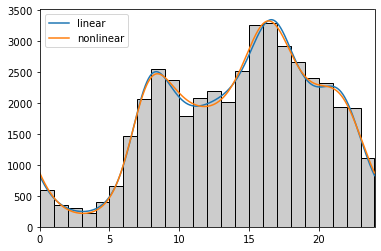

In [6]:
plt.bar(range(24), eb_counts, width = 1, align = 'edge', edgecolor = 'k', facecolor = '#cccccc')
eb_profile_linear.plot(1440, label = 'linear')
eb_profile_nonlinear.plot(1440, label = 'nonlinear')
plt.xlim(0, 24)
plt.legend(loc = 'best')
plt.show()

In [7]:
eb_counts_linear = eb_profile_linear[range(25)]
eb_counts_nonlinear = eb_profile_nonlinear[range(25)]

print('Linear:    ' + str(r(eb_counts, eb_counts_linear)))
print('Nonlinear: ' + str(r(eb_counts, eb_counts_nonlinear)))

Linear:    (0.9906559776437415, 1.5644472426954018e-20)
Nonlinear: (0.9915253287600532, 5.365088880298278e-21)


#Westbound check

In [8]:
print((wb_profile_linear.dist.log_pdf_coef.c))
print((wb_profile_nonlinear.dist.log_pdf_coef.c))

[-2.07008372-1.74972490e-17j -0.38733286+2.10298230e-01j
 -0.14007134+2.88783925e-01j  0.08523401+1.42588500e-01j
  0.06165729-1.82098603e-02j -0.01919281-3.16324657e-02j]
[-2.07287386-7.51573326e-17j -0.39582757+2.09647447e-01j
 -0.15291453+2.92206489e-01j  0.07263574+1.57493773e-01j
  0.06381907+8.20186782e-03j  0.00762   -1.27550504e-02j]


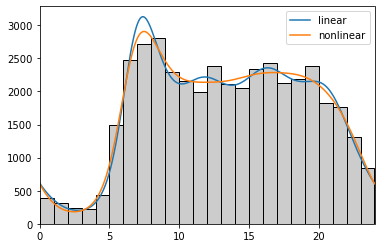

In [9]:
plt.bar(range(24), wb_counts, width = 1, align = 'edge', edgecolor = 'k', facecolor = '#cccccc')
wb_profile_linear.plot(1440, label = 'linear')
wb_profile_nonlinear.plot(1440, label = 'nonlinear')
plt.xlim(0, 24)
plt.legend(loc = 'best')
plt.show()

In [10]:
wb_counts_linear = wb_profile_linear[range(25)]
wb_counts_nonlinear = wb_profile_nonlinear[range(25)]

print('Linear:    ' + str(r(wb_counts, wb_counts_linear)))
print('Nonlinear: ' + str(r(wb_counts, wb_counts_nonlinear)))

Linear:    (0.9859742326477203, 1.3344897277634653e-18)
Nonlinear: (0.9895916733078025, 5.099773607265153e-20)
